# Transformada Discreta de Fourier en 2D (DFT-2D)

**Resultado (Teorema de Convolución)**

Sea $g(x,y)$ una imagen obtenida por la convolución de la imagen f(x,y) con un operador h(x,y), es decir,

\begin{equation}
g(x,y)=f(x,y)*h(x,y)
\end{equation}

Entonces se obtiene

\begin{equation}
G(u,v)=F(u,v)*H(u,v)
\end{equation}

donde $G$, $F$ y $H$ son las DFT-2D de $g$, $f$ y $h$, respectivamente.

# Representación Gráfica de los Filtros
## Opción 1: Dominio Espacial

![title](media/representacion-grafica-filtros-opcion1.png)

## Opción 2: Dominio de la Frecuencia

![title](media/representacion-grafica-filtros-opcion2.png)

# Filtros en el Dominio de la Frecuencia

## Filtros Paso Bajo

### Filtro Ideal

\begin{equation}
H_I(u,v)=\left\lbrace
\begin{array}{lcr}
     1 \quad \text{si} \quad D(u,v) \leq D_0 \\
     0 \quad \text{si} \quad D(u,v) > D_0
\end{array}
\right.
\end{equation}

donde $D(u,v)=\sqrt{u^2+v^2}$, y $D_0$ es un valor no negativo, el cual se refiere al corte de la frecuencia.

**Nota.** Se asume que, en este caso, $H_I(0,0)$ está ubicado en el centro.

![title](media/grafica-filtro-ideal.svg)

**Ejemplo**

![title](media/ejemplo-filtro-ideal.svg)

¿Qué pasa si se aplica el comando *fftshift*?

![title](media/fftshift.svg)


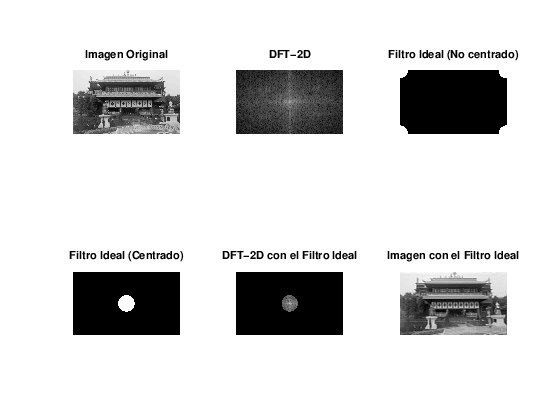

In [1]:
pkg load image;

% Ejemplo Filtro Ideal (Paso Bajo)
clc; clear; close all;
X = imread('media/edificio_china.jpg');
subplot(2, 3, 1);
imshow(X);
title('Imagen Original');
X = im2double(X);

% Calcular DFT-2D de la imagen
F = fft2(X);
F_shift = fftshift(F);
subplot(2, 3, 2);
imshow(log(1+abs(F_shift)), []);
title('DFT-2D');

% Calcular el Filtro Ideal en el Dominio de la Frecuencia
% 1. Calcular la matriz de distancia
[m, n] = size(X); dist = zeros(m, n);
for i = 1:m
  for j = 1:n
    dist(i, j) = sqrt(i^2 + j^2);
  endfor
endfor
% 2. Obtener el Filtro Ideal
H = zeros(m, n); D0 = 50; ind = (dist<=D0); H(ind) = 1;

% Se obtiene el cuadrante donde se encuentra la cuarta parte del total
H_aux = H(1:floor(m/2), 1:floor(n/2));
H_sup_der = fliplr(H_aux); % Esquina superior derecha
% Se rota la imagen H_aux 180 grados para obtener la esquina inferior derecha
H_inf_der = imrotate(H_aux, 180); % Esquina inferior derecha
H_inf_izq = fliplr(H_inf_der); % Esquina inferior izquierda

[m1, n1] = size(H_aux);
H(1:m1, n-n1+1:n) = H_sup_der;
H(m-m1+1:m, n-n1+1:n) = H_inf_der;
H(m-m1+1:m, 1:n1) = H_inf_izq;

subplot(2, 3, 3);
imshow(H);
title('Filtro Ideal (No centrado)')

subplot(2, 3, 4);
imshow(fftshift(H));
title('Filtro Ideal (Centrado)')


% Aplicar el filtro
DFT2_filt = F.*H;
FM_shift = fftshift(DFT2_filt);
subplot(2, 3, 5);
imshow(log(1+abs(FM_shift)), [])
title('DFT-2D con el Filtro Ideal')

% Imagen filtrada
I_new = real(ifft2(DFT2_filt));
subplot(2, 3, 6);
imshow(I_new);
title('Imagen con el Filtro Ideal');

### Filtro Gaussiano

\begin{equation}
H_G(u,v)=e^{\left(\dfrac{-D(u,v)^2}{2 \sigma^2}\right)}
\end{equation}

donde $\sigma>0$, es un parámetro de corte.

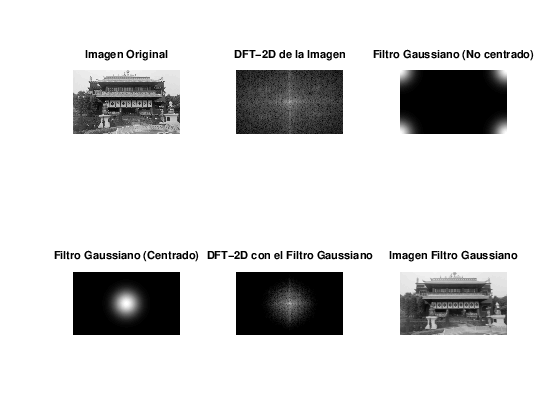

In [2]:
% Ejemplo Filtro Gaussiano (Paso Bajo)
clc; clear; close all;
pkg load image;

X = imread('media/edificio_china.jpg');
subplot(2, 3, 1);
imshow(X);
title('Imagen Original');
X = im2double(X);

% Calcular DFT-2D de la imagen
F = fft2(X);
F_shift = fftshift(F);
subplot(2, 3, 2);
imshow(log(1+abs(F_shift)), []);
title('DFT-2D de la Imagen');

% Calcular el Filtro Gaussiano en el Dominio de la Frecuencia
% 1. Calcular la matriz de distancia
[m, n] = size(X); dist = zeros(m, n);
for i = 1:m
  for j = 1:n
    dist(i, j) = sqrt(i^2 + j^2);
  endfor
endfor
% 2. Obtener el Filtro Gaussiano
sigma = 50;
H = exp(-(dist.^2)/(2*sigma^2));

% Este filtro H, solo tiene una cuarta parte del total
% Se obtiene el cuadrante donde se encuentra la cuarta parte del total
H_aux = H(1:floor(m/2), 1:floor(n/2));
H_sup_der = fliplr(H_aux); % Esquina superior derecha
% Se rota la imagen H_aux 180 grados para obtener la esquina inferior derecha
H_inf_der = imrotate(H_aux, 180); % Esquina inferior derecha
H_inf_izq = fliplr(H_inf_der); % Esquina inferior izquierda

[m1, n1] = size(H_aux);
H(1:m1, n-n1+1:n) = H_sup_der;
H(m-m1+1:m, n-n1+1:n) = H_inf_der;
H(m-m1+1:m, 1:n1) = H_inf_izq;

subplot(2, 3, 3);
imshow(H);
title('Filtro Gaussiano (No centrado)')

subplot(2, 3, 4);
imshow(fftshift(H));
title('Filtro Gaussiano (Centrado)')

% Aplicar el filtro
DFT2_filt = F.*H;
FM_shift = fftshift(DFT2_filt);
subplot(2, 3, 5);
imshow(log(1+abs(FM_shift)), [])
title('DFT-2D con el Filtro Gaussiano')

% Imagen filtrada
I_new = real(ifft2(DFT2_filt));
subplot(2, 3, 6);
imshow(I_new);
title('Imagen Filtro Gaussiano');

### Filtro Butterworth

\begin{equation}
H_B(u,v)=\dfrac{1}{1+\left[\dfrac{D_0}{D(u,v)}\right]^{-2n}}
\end{equation}

donde $D_0$ es la frecuencia de corte y $n$ es el orden.

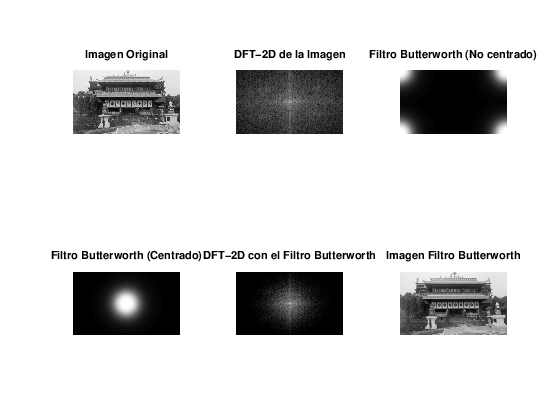

In [3]:
% Ejemplo Filtro Butterworth (Paso Bajo)
clc; clear; close all;
pkg load image;

X = imread('media/edificio_china.jpg');
subplot(2, 3, 1);
imshow(X);
title('Imagen Original');
X = im2double(X);

% Calcular DFT-2D de la imagen
F = fft2(X);
F_shift = fftshift(F);
subplot(2, 3, 2);
imshow(log(1+abs(F_shift)), []);
title('DFT-2D de la Imagen');

% Calcular el Filtro Butterworth en el Dominio de la Frecuencia
% 1. Calcular la matriz de distancia
[m, n] = size(X); dist = zeros(m, n);
for i = 1:m
  for j = 1:n
    dist(i, j) = sqrt(i^2 + j^2);
  endfor
endfor
% 2. Obtener el Filtro Butterworth
D0 = 75; orden = 2;
H = 1./(1+(D0./dist).^(-2*orden));

% Este filtro H, solo tiene una cuarta parte del total
% Se obtiene el cuadrante donde se encuentra la cuarta parte del total
H_aux = H(1:floor(m/2), 1:floor(n/2));
H_sup_der = fliplr(H_aux); % Esquina superior derecha
% Se rota la imagen H_aux 180 grados para obtener la esquina inferior derecha
H_inf_der = imrotate(H_aux, 180); % Esquina inferior derecha
H_inf_izq = fliplr(H_inf_der); % Esquina inferior izquierda

[m1, n1] = size(H_aux);
H(1:m1, n-n1+1:n) = H_sup_der;
H(m-m1+1:m, n-n1+1:n) = H_inf_der;
H(m-m1+1:m, 1:n1) = H_inf_izq;

subplot(2, 3, 3);
imshow(H);
title('Filtro Butterworth (No centrado)')

subplot(2, 3, 4);
imshow(fftshift(H));
title('Filtro Butterworth (Centrado)')

% Aplicar el filtro
DFT2_filt = F.*H;
FM_shift = fftshift(DFT2_filt);
subplot(2, 3, 5);
imshow(log(1+abs(FM_shift)), [])
title('DFT-2D con el Filtro Butterworth')

% Imagen filtrada
I_new = real(ifft2(DFT2_filt));
subplot(2, 3, 6);
imshow(I_new);
title('Imagen Filtro Butterworth');


## Filtros Paso Alto

### Filtro Ideal

\begin{equation}
H_I(u,v)=\left\lbrace
\begin{array}{lcr}
     0 \quad \text{si} \quad D(u,v) \leq D_0 \\
     1 \quad \text{si} \quad D(u,v) > D_0
\end{array}
\right.
\end{equation}

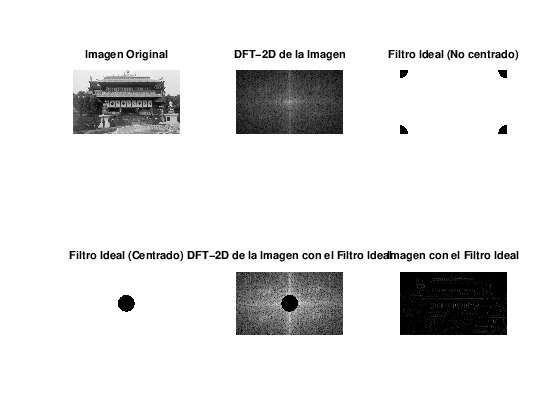

In [4]:
% Ejemplo Filtro Ideal (Paso Alto)
clc; clear; close all;
pkg load image;
X = imread('media/edificio_china.jpg');
subplot(2, 3, 1);
imshow(X);
title('Imagen Original');
X = im2double(X);

% Calcular DFT-2D de la imagen
F = fft2(X);
F_shift = fftshift(F);
subplot(2, 3, 2);
imshow(log(1+abs(F_shift)), []);
title('DFT-2D de la Imagen');

% Calcular el Filtro Ideal en el Dominio de la Frecuencia
% 1. Calcular la matriz de distancia
[m, n] = size(X); dist = zeros(m, n);
m1 = floor(m/2); n1 = floor(n/2);
for i = 1:m
  for j = 1:n
    dist(i, j) = sqrt((i-m1)^2 + (j-n1)^2);
  endfor
endfor
% 2. Obtener el Filtro Ideal
H = zeros(m, n); D0 = 50; ind = (dist>D0); H(ind) = 1;

H_nc = fftshift(H);

subplot(2, 3, 3);
imshow(H_nc);
title('Filtro Ideal (No centrado)')

subplot(2, 3, 4);
imshow(H);
title('Filtro Ideal (Centrado)')


% Aplicar el filtro
DFT2_filt = F.*H_nc;
FM_shift = fftshift(DFT2_filt);
subplot(2, 3, 5);
imshow(log(1+abs(FM_shift)), [])
title('DFT-2D de la Imagen con el Filtro Ideal')

% Imagen filtrada
I_new = real(ifft2(DFT2_filt));
subplot(2, 3, 6);
imshow(I_new);
title('Imagen con el Filtro Ideal');


### Filtro Gaussiano

\begin{equation}
H_G(u,v)=1-e^{\left(\dfrac{-D(u,v)^2}{2 \sigma^2}\right)}
\end{equation}

donde $\sigma>0$ es el parámetro de corte.

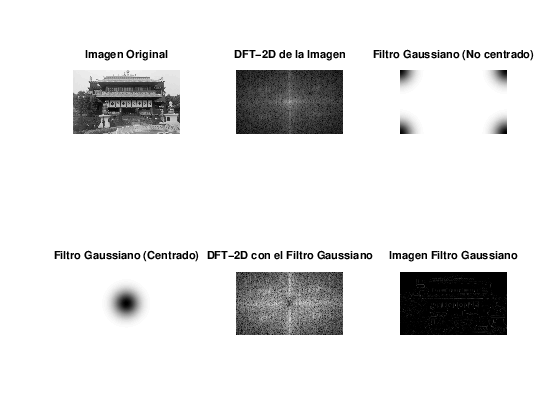

In [5]:
% Ejemplo Filtro Gaussiano (Paso Alto)
clc; clear; close all;
pkg load image;

X = imread('media/edificio_china.jpg');
subplot(2, 3, 1);
imshow(X);
title('Imagen Original');
X = im2double(X);

% Calcular DFT-2D de la imagen
F = fft2(X);
F_shift = fftshift(F);
subplot(2, 3, 2);
imshow(log(1+abs(F_shift)), []);
title('DFT-2D de la Imagen');

% Calcular el Filtro Gaussiano en el Dominio de la Frecuencia
% 1. Calcular la matriz de distancia
[m, n] = size(X); dist = zeros(m, n);
m1 = floor(m/2); n1 = floor(n/2);
for i = 1:m
  for j = 1:n
    dist(i, j) = sqrt((i-m1)^2 + (j-n1)^2);
  endfor
endfor
% 2. Obtener el Filtro Gaussiano
sigma = 50;
H = 1-exp(-(dist.^2)/(2*sigma^2));

H_nc = fftshift(H);
subplot(2, 3, 3);
imshow(H_nc);
title('Filtro Gaussiano (No centrado)')

subplot(2, 3, 4);
imshow(H);
title('Filtro Gaussiano (Centrado)')

% Aplicar el filtro
DFT2_filt = F.*H_nc;
FM_shift = fftshift(DFT2_filt);
subplot(2, 3, 5);
imshow(log(1+abs(FM_shift)), [])
title('DFT-2D con el Filtro Gaussiano')

% Imagen filtrada
I_new = real(ifft2(DFT2_filt));
subplot(2, 3, 6);
imshow(I_new);
title('Imagen Filtro Gaussiano');

### Filtro Butterworth

\begin{equation}
H_B(u,v)=\dfrac{1}{1+\left[\dfrac{D_0}{D(u,v)}\right]^{2n}}
\end{equation}

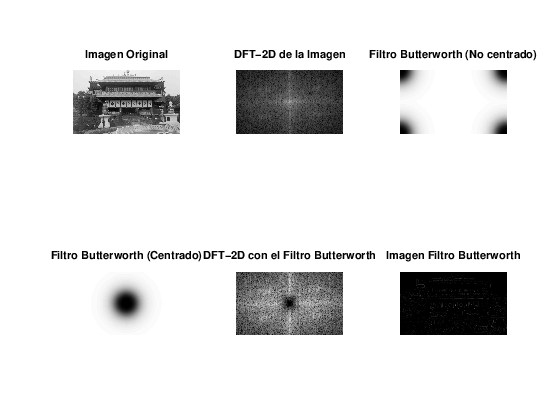

In [6]:
% Ejemplo Filtro Butterworth (Paso Alto)
clc; clear; close all;
pkg load image;

X = imread('media/edificio_china.jpg');
subplot(2, 3, 1);
imshow(X);
title('Imagen Original');
X = im2double(X);

% Calcular DFT-2D de la imagen
F = fft2(X);
F_shift = fftshift(F);
subplot(2, 3, 2);
imshow(log(1+abs(F_shift)), []);
title('DFT-2D de la Imagen');

% Calcular el Filtro Butterworth en el Dominio de la Frecuencia
% 1. Calcular la matriz de distancia
[m, n] = size(X); dist = zeros(m, n);
m1 = floor(m/2); n1 = floor(n/2);
for i = 1:m
  for j = 1:n
    dist(i, j) = sqrt((i-m1)^2 + (j-n1)^2);
  endfor
endfor
% 2. Obtener el Filtro Butterworth
D0 = 75; orden = 2;
H = 1./(1+(D0./dist).^(2*orden));

H_nc = fftshift(H);
subplot(2, 3, 3);
imshow(H_nc);
title('Filtro Butterworth (No centrado)')

subplot(2, 3, 4);
imshow(H);
title('Filtro Butterworth (Centrado)')

% Aplicar el filtro
DFT2_filt = F.*H_nc;
FM_shift = fftshift(DFT2_filt);
subplot(2, 3, 5);
imshow(log(1+abs(FM_shift)), [])
title('DFT-2D con el Filtro Butterworth')

% Imagen filtrada
I_new = real(ifft2(DFT2_filt));
subplot(2, 3, 6);
imshow(I_new);
title('Imagen Filtro Butterworth');
